# Prediction using Decision Trees:-

# Raunak Ghosh

# Dataset to be used is the Iris dataset.

Task 2(Intermediate Level)

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Data loading

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Dropping unnecessary columns because it will not add any weightage to the final predictions
#Here Id column does seem a bit insignificant.
df=df.drop('Id',axis=1)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data exploration:-

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for null values

In [22]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values

# Training the input and output features

In [9]:
x=df.iloc[:,:-1]

In [10]:
y=df.iloc[:,-1]

In [11]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:
#next step would be to convert categorical variables into numerical features since a 
#machine learning algorithm only takes in input features

# Encoding categorical features

In [13]:
#I will use label encoding in place of one hot encoding because one hot encoding increases the feature space more.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Splitting the data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
x_train.shape, x_test.shape

((112, 4), (38, 4))

# Model Building

In [24]:
#Before building model I want to perform a K-fold cross validation just to get the best model

In [27]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score

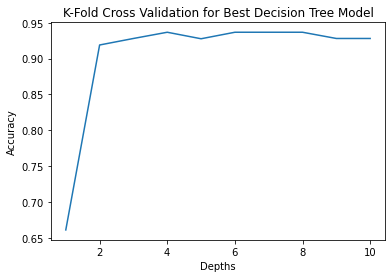

In [28]:
depth=[1,2,3,4,5,6,7,8,9,10]
cv_score=[]
for d in depth:
    dt=DTC(max_depth=d)
    score=cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy')
    cv_score.append(score.mean())
plt.plot(depth,cv_score)
plt.title('K-Fold Cross Validation for Best Decision Tree Model')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.show()

In [29]:
#At depths 4 and 6 we can see the accuracy is maximum. So we build two models and compare it and then choose a final model.

In [30]:
dt1=DTC(max_depth=4)
dt2=DTC(max_depth=6)

In [31]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [32]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

# Model Evaluation

Model 1 predictions on test data

In [34]:
y_pred1=dt1.predict(x_test)

Model 2 predictions on test data

In [36]:
y_pred2=dt2.predict(x_test)

In [37]:
print(y_pred1)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [38]:
print(y_pred2)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [39]:
print(np.array(y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix as cm

Model 1 accuracy

In [44]:
print(accuracy_score(y_test,y_pred1))

1.0


Model 2 accuracy

In [45]:
print(accuracy_score(y_test,y_pred1))

1.0


# Inference:-
Both the models are highly accurate. So we can go with any one of them. I am going with the model with depth 4

Confusion Matrix

In [47]:
print(cm(y_test,y_pred1))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#Model visualization of Decision Tree 

In [48]:
from sklearn import tree

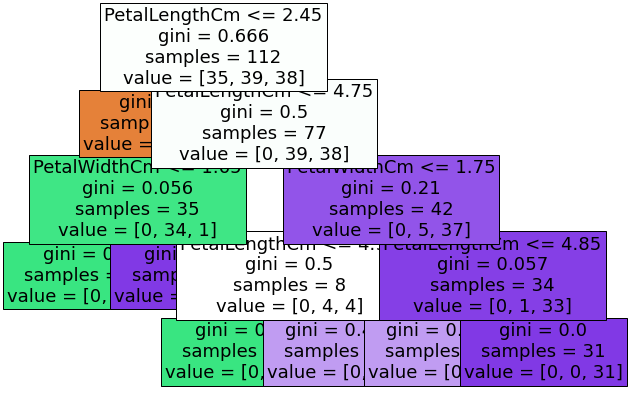

In [49]:
plt.figure(figsize=(10,7))
dtviz=tree.plot_tree(dt1,feature_names=x.columns,filled=True,fontsize=18)